## Imports, data load, metric function definition

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import time
import os

import plotly.express as px
import random
import numpy.random as npr
from sklearn.model_selection import train_test_split

dossier = 'D:/DocDataM2/S3UE1_Datachallenge/'
os.chdir(dossier)

In [3]:
X_npz = np.load('X_train_surge_new.npz')
Y = pd.read_csv('Y_train_surge.csv')
X_test_finale = np.load('X_test_surge_new.npz')

In [4]:
for cle in X_npz:
    print( type(X_npz[cle]), '\t', cle, '\t', X_npz[cle].shape )

cles = list(X_npz.keys())
print(cles)

<class 'numpy.ndarray'> 	 id_sequence 	 (5599,)
<class 'numpy.ndarray'> 	 t_slp 	 (5599, 40)
<class 'numpy.ndarray'> 	 slp 	 (5599, 40, 41, 41)
<class 'numpy.ndarray'> 	 t_surge1_input 	 (5599, 10)
<class 'numpy.ndarray'> 	 surge1_input 	 (5599, 10)
<class 'numpy.ndarray'> 	 t_surge2_input 	 (5599, 10)
<class 'numpy.ndarray'> 	 surge2_input 	 (5599, 10)
<class 'numpy.ndarray'> 	 t_surge1_output 	 (5599, 10)
<class 'numpy.ndarray'> 	 t_surge2_output 	 (5599, 10)
['id_sequence', 't_slp', 'slp', 't_surge1_input', 'surge1_input', 't_surge2_input', 'surge2_input', 't_surge1_output', 't_surge2_output']


In [5]:
##### choix des données d'entrainement  : #####
taux = 0.6

slice_train = np.bool_(npr.binomial(1,taux,5599))
k_train = range(5599)*slice_train

print('Train :')
print(slice_train[:10])
print(k_train[:10])
n_train = sum(slice_train)

k_train.sort()
k_train = k_train[5599-n_train:]  # on enlève tous les zeros
print(k_train)


##### choix des données de test  : #####
slice_test = ~slice_train
k_test = range(5599)*slice_test

print('Test :')
print(slice_test[:10])
print(k_test[:10])
n_test = 5599 - n_train

k_test.sort()
k_test = k_test[5599-n_test:]  # on enlève tous les zeros
print(k_test)


Train :
[ True  True False False False  True False  True False  True]
[0 1 0 0 0 5 0 7 0 9]
[   0    1    5 ... 5595 5597 5598]
Test :
[False False  True  True  True False  True False  True False]
[0 0 2 3 4 0 6 0 8 0]
[   2    3    4 ... 5591 5594 5596]


In [6]:
# Transformer les données en df_train
df_train = pd.DataFrame(index = range(n_train))

# On commence par construire un df qui contient les t_spl
df_train['t_slp'] = list(X_npz['t_slp'][slice_train])

df_train.head(5)


##### Même chose avec les données de test #####
df_test = pd.DataFrame(index = range(n_test))
df_test['t_slp'] = list(X_npz['t_slp'][slice_test])
#df_test.head(5)

In [7]:
# on ajoute les image slp

which_slp = [0,1,2,3,10,20,30]   # 40 valeurs de 0 à 39

for k in which_slp:
    print(k, end=' ; ')
    #print(X_npz['slp'].shape)
    #print(X_npz['slp'][slice_train][:,k,:,:].shape)
    df_train[f"slp_{k}"] = list(X_npz['slp'][slice_train][:,k,:,:])

print()
print(df_train.head(5))


##### Même chose avec les données de test #####

for k in which_slp:
    print(k, end=' ; ')
    df_test[f"slp_{k}"] = list(X_npz['slp'][slice_test][:,k,:,:])
#print(df_test.head(5))

0 ; 1 ; 2 ; 3 ; 10 ; 20 ; 30 ; 
                                               t_slp  \
0  [-631076400.0, -631065600.0, -631054800.0, -63...   
1  [-630979200.0, -630968400.0, -630957600.0, -63...   
2  [-630622800.0, -630612000.0, -630601200.0, -63...   
3  [-630439200.0, -630428400.0, -630417600.0, -63...   
4  [-630266400.0, -630255600.0, -630244800.0, -63...   

                                               slp_0  \
0  [[102389.25, 102458.25, 102514.25, 102554.25, ...   
1  [[101895.6, 101970.6, 102032.6, 102077.6, 1021...   
2  [[100756.9, 100726.9, 100695.9, 100661.9, 1006...   
3  [[102022.67, 102057.67, 102086.67, 102108.67, ...   
4  [[102235.18, 102241.18, 102265.18, 102296.18, ...   

                                               slp_1  \
0  [[102365.96, 102424.96, 102472.96, 102509.96, ...   
1  [[101783.33, 101861.33, 101927.33, 101974.33, ...   
2  [[100623.95, 100610.95, 100599.95, 100586.95, ...   
3  [[102106.72, 102151.72, 102194.72, 102231.72, ...   
4  [[102332.42

In [9]:
# on ajoute les 'surge' 'input'

liste_surge_inp = ['t_surge1_input', 'surge1_input', 't_surge2_input', 'surge2_input']

for surge in liste_surge_inp:
    df_train[surge] = list(X_npz[surge][slice_train])


##### Même chose avec les données de test #####
for surge in liste_surge_inp:
    df_test[surge] = list(X_npz[surge][slice_test])



In [12]:
df_train.to_csv('export_X_train.csv')  # je n'obtient pas ce que je veux (les données sont des chaines de caractères)
df_train.head(2)
df_test.to_csv('export_X_test.csv')
df_test.head(2)

,t_slp,slp_0,slp_1,slp_2,slp_3,slp_10,slp_20,slp_30,t_surge1_input,surge1_input,t_surge2_input,surge2_input
0,"[-630892800.0, -630882000.0, -630871200.0, -63...","[[101661.24, 101700.24, 101774.24, 101849.24, ...","[[101623.4, 101650.4, 101714.4, 101784.4, 1018...","[[101551.69, 101575.69, 101638.69, 101709.69, ...","[[101593.84, 101610.84, 101673.84, 101749.84, ...","[[101194.43, 101214.43, 101296.43, 101402.43, ...","[[101123.65, 101086.65, 101055.65, 101033.65, ...","[[100723.26, 100655.26, 100589.26, 100529.26, ...","[-630928800.0, -630885600.0, -630842400.0, -63...","[-0.22752637, -0.4018146, -0.87440383, -0.6397...","[-630925200.0, -630882000.0, -630835200.0, -63...","[-1.1435843, -0.81667477, -0.7579987, -0.12932..."
1,"[-630806400.0, -630795600.0, -630784800.0, -63...","[[101366.41, 101393.41, 101476.41, 101577.41, ...","[[101268.03, 101287.03, 101366.03, 101470.03, ...","[[101194.43, 101214.43, 101296.43, 101402.43, ...","[[101241.27, 101263.27, 101343.27, 101450.27, ...","[[101055.49, 101021.49, 100994.49, 100975.49, ...","[[100670.97, 100631.97, 100615.97, 100617.97, ...","[[101691.09, 101699.09, 101704.09, 101706.09, ...","[-630842400.0, -630799200.0, -630752400.0, -63...","[-0.87440383, -0.63978505, -1.0755056, -1.7123...","[-630835200.0, -630792000.0, -630748800.0, -63...","[-0.7579987, -0.12932655, -0.17962031, -0.3724..."


In [15]:
# Création des variables d'entrées X pour chacune des villes 1 et 2:

colonnes_slp = ['t_slp']+[f"slp_{k}" for k in which_slp]
X_train_1 = df_train[colonnes_slp + ['t_surge1_input', 'surge1_input']]
X_train_2 = df_train[colonnes_slp + ['t_surge2_input', 'surge2_input']]


##### Même chose avec les données de test #####
X_test_1 = df_test[colonnes_slp + ['t_surge1_input', 'surge1_input']]
X_test_2 = df_test[colonnes_slp + ['t_surge2_input', 'surge2_input']]



In [19]:
# Création des variables de sortie Y

Y_train_1_1 = [X_npz['t_surge1_output'][slice_train][k][0] for k in range(n_train)]
exec("Y_train_1_1 = list(X_npz['t_surge1_output'][slice_train])")
print(Y_train_1_1[])
"""
Y_train_1 = df_train[['t_surge1_output']]

Y_train_2 = df_train[['t_surge2_output']]
Y_test_1 = df_test[['t_surge1_output']]
Y_test_2 = df_test[['t_surge2_output']]"""


AttributeError: 'list' object has no attribute 'shape'

In [28]:
Y_train_1_1 = [X_npz['t_surge1_output'][slice_train][k][0] for k in range(n_train)]
Y_train_1_1

[-630662400.0,
 -630576000.0,
 -630219600.0,
 -630039600.0,
 -629856000.0,
 -629766000.0,
 -627980400.0,
 -627717600.0,
 -627624000.0,
 -627354000.0,
 -627174000.0,
 -619974000.0,
 -619704000.0,
 -619437600.0,
 -619174800.0,
 -617698800.0,
 -617608800.0,
 -617518800.0,
 -617338800.0,
 -617248800.0,
 -617158800.0,
 -617068800.0,
 -616978800.0,
 -616802400.0,
 -615412800.0,
 -615146400.0,
 -615060000.0,
 -614696400.0,
 -614523600.0,
 -613137600.0,
 -613047600.0,
 -612957600.0,
 -612777600.0,
 -612687600.0,
 -612601200.0,
 -612424800.0,
 -612338400.0,
 -610855200.0,
 -610761600.0,
 -610671600.0,
 -610491600.0,
 -610405200.0,
 -610311600.0,
 -610228800.0,
 -610052400.0,
 -608490000.0,
 -608396400.0,
 -608306400.0,
 -608122800.0,
 -608036400.0,
 -607946400.0,
 -607770000.0,
 -607680000.0,
 -606207600.0,
 -606027600.0,
 -605934000.0,
 -605754000.0,
 -605664000.0,
 -605574000.0,
 -603925200.0,
 -603748800.0,
 -603478800.0,
 -603298800.0,
 -603205200.0,
 -603118800.0,
 -601736400.0,
 -60164640

In [25]:
Y_train_1_1

[array([-6.306624e+08, -6.306192e+08, -6.305760e+08, -6.305328e+08,
        -6.304860e+08, -6.304428e+08, -6.303996e+08, -6.303528e+08,
        -6.303096e+08, -6.302664e+08], dtype=float32),
 array([-6.305760e+08, -6.305328e+08, -6.304860e+08, -6.304428e+08,
        -6.303996e+08, -6.303528e+08, -6.303096e+08, -6.302664e+08,
        -6.302196e+08, -6.301728e+08], dtype=float32),
 array([-6.302196e+08, -6.301728e+08, -6.301296e+08, -6.300864e+08,
        -6.300396e+08, -6.299928e+08, -6.299496e+08, -6.299028e+08,
        -6.298560e+08, -6.298128e+08], dtype=float32),
 array([-6.300396e+08, -6.299928e+08, -6.299496e+08, -6.299028e+08,
        -6.298560e+08, -6.298128e+08, -6.297660e+08, -6.297228e+08,
        -6.296796e+08, -6.296328e+08], dtype=float32),
 array([-6.298560e+08, -6.298128e+08, -6.297660e+08, -6.297228e+08,
        -6.296796e+08, -6.296328e+08, -6.295896e+08, -6.295428e+08,
        -6.294996e+08, -6.294528e+08], dtype=float32),
 array([-6.297660e+08, -6.297228e+08, -6.2967

In [37]:
list(X_train_1.keys())

['t_slp',
 'slp_0',
 'slp_1',
 'slp_2',
 'slp_3',
 'slp_10',
 'slp_20',
 'slp_30',
 't_surge1_input',
 'surge1_input']

In [48]:
Y_train_1.to_numpy()[:,0,0]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [29]:
## Mesure de la qualité de la prédicition

def surge_prediction_metric(dataframe_y_true, dataframe_y_pred):
    weights = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_columns = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge2_columns = [
        'surge2_t0', 'surge2_t1', 'surge2_t2', 'surge2_t3', 'surge2_t4',
        'surge2_t5', 'surge2_t6', 'surge2_t7', 'surge2_t8', 'surge2_t9' ]
    surge1_score = (weights * (dataframe_y_true[surge1_columns].values - dataframe_y_pred[surge1_columns].values)**2).mean()
    surge2_score = (weights * (dataframe_y_true[surge2_columns].values - dataframe_y_pred[surge2_columns].values)**2).mean()

    return surge1_score + surge2_score

In [43]:
X_train_1['slp_0'].to_numpy()

array([array([[102389.25, 102458.25, 102514.25, ..., 101276.25, 101275.25,
               101271.25],
              [102432.25, 102509.25, 102572.25, ..., 101268.25, 101266.25,
               101268.25],
              [102467.25, 102552.25, 102624.25, ..., 101255.25, 101255.25,
               101256.25],
              ...,
              [101414.25, 101423.25, 101407.25, ..., 100039.25, 100005.25,
               100019.25],
              [101986.25, 102006.25, 101961.25, ..., 100100.25, 100076.25,
               100096.25],
              [102685.25, 102702.25, 102688.25, ..., 100334.25, 100330.25,
               100362.25]], dtype=float32)                                ,
       array([[101895.6, 101970.6, 102032.6, ..., 101488.6, 101466.6, 101446.6],
              [101878.6, 101965.6, 102037.6, ..., 101508.6, 101484.6, 101464.6],
              [101851.6, 101952.6, 102037.6, ..., 101526.6, 101506.6, 101484.6],
              ...,
              [101946.6, 101971.6, 101969.6, ..., 100416.6

In [44]:
## Un prmeier essai de prédiction et mesure :

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV


# CV
#parameters = {'n_neighbors':20}      #range(1, 25)}
#knn = KNeighborsClassifier()
#clf = GridSearchCV(knn, parameters, scoring=["accuracy"], refit="f1")
#clf.fit(X_train, Y_train)

knn = KNeighborsClassifier(20)
#clf = GridSearchCV(knn, parameters, scoring=["accuracy"], refit="f1")
knn.fit(X_train_1['slp_0'].to_numpy(), Y_train_1_1)


ValueError: setting an array element with a sequence.

In [ ]:

# Best estimator with accuracy score
best_accuracy_index = np.nonzero(clf.cv_results_['rank_test_accuracy'] == 1)[0][0]   # ???
best_accuracy_score = clf.cv_results_['mean_test_accuracy'][best_accuracy_index]
print(f"Best estimator: {clf.best_estimator_} with accuracy mean score of {round(best_accuracy_score,3)}.")

# Best estimator with f1 score
best_f1_index = np.nonzero(clf.cv_results_['rank_test_f1'] == 1)[0][0]
best_f1_score = clf.cv_results_['mean_test_f1'][best_f1_index]
print(f"Best estimator: {clf.best_estimator_} with f1 mean score of {round(best_f1_score,3)}.")

In [ ]:
# CV
parameters = {'n_neighbors':range(1, 25)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring=["accuracy", "f1"], refit="f1")
clf.fit(X_train, y_train)

# Best estimator with accuracy score
best_accuracy_index = np.nonzero(clf.cv_results_['rank_test_accuracy'] == 1)[0][0]   # ???
best_accuracy_score = clf.cv_results_['mean_test_accuracy'][best_accuracy_index]
print(f"Best estimator: {clf.best_estimator_} with accuracy mean score of {round(best_accuracy_score,3)}.")

# Best estimator with f1 score
best_f1_index = np.nonzero(clf.cv_results_['rank_test_f1'] == 1)[0][0]
best_f1_score = clf.cv_results_['mean_test_f1'][best_f1_index]
print(f"Best estimator: {clf.best_estimator_} with f1 mean score of {round(best_f1_score,3)}.")

In [22]:

cles = ['t_slp', 'slp', 't_surge1_input', 'surge1_input', 't_surge1_output']

df = pd.DataFrame()

for i, cle in enumerate(X_npz):

    if cle in cles:
        print(cle)

        data = []

        for k in range(5599):
            if slice_entrainement[k]:
                #print(data[:10])
                data.append(X_npz[cle][k])
        print(len(data)   )
        print(data[:2])
        df[cle] = data
        print(df.head(2))



# On construits un df avec les données de t_spl
#X_df_1 = pd.DataFrame(X_npz['t_slp'], columns= [f't_slp_{k}' for k in range(40)])

df.head(5)

t_slp
3321
[array([-6.310764e+08, -6.310656e+08, -6.310548e+08, -6.310440e+08,
       -6.310332e+08, -6.310224e+08, -6.310116e+08, -6.310008e+08,
       -6.309900e+08, -6.309792e+08, -6.309684e+08, -6.309576e+08,
       -6.309468e+08, -6.309360e+08, -6.309252e+08, -6.309144e+08,
       -6.309036e+08, -6.308928e+08, -6.308820e+08, -6.308712e+08,
       -6.308604e+08, -6.308496e+08, -6.308388e+08, -6.308280e+08,
       -6.308172e+08, -6.308064e+08, -6.307956e+08, -6.307848e+08,
       -6.307740e+08, -6.307632e+08, -6.307524e+08, -6.307416e+08,
       -6.307308e+08, -6.307200e+08, -6.307092e+08, -6.306984e+08,
       -6.306876e+08, -6.306768e+08, -6.306660e+08, -6.306552e+08],
      dtype=float32), array([-6.309792e+08, -6.309684e+08, -6.309576e+08, -6.309468e+08,
       -6.309360e+08, -6.309252e+08, -6.309144e+08, -6.309036e+08,
       -6.308928e+08, -6.308820e+08, -6.308712e+08, -6.308604e+08,
       -6.308496e+08, -6.308388e+08, -6.308280e+08, -6.308172e+08,
       -6.308064e+08, -6.30

MemoryError: Unable to allocate 1.40 GiB for an array with shape (376476760,) and data type float32

In [28]:
df = pd.DataFrame()

# pas de conservation des image slp
pas = 5
garde = np.arange(0,40,pas)

cle = 'slp'

data = []

for k in range(5599):
    if slice_entrainement[k]:
        print(k, X_npz[cle][k][garde].shape)
        data.append(X_npz[cle][k][garde])
    
print(data[:2])
df[cle] = data
print(df.head(2))



0 (8, 41, 41)
1 (8, 41, 41)
2 (8, 41, 41)
4 (8, 41, 41)
5 (8, 41, 41)
6 (8, 41, 41)
8 (8, 41, 41)
11 (8, 41, 41)
12 (8, 41, 41)
16 (8, 41, 41)
17 (8, 41, 41)
19 (8, 41, 41)
20 (8, 41, 41)
21 (8, 41, 41)
22 (8, 41, 41)
28 (8, 41, 41)
29 (8, 41, 41)
31 (8, 41, 41)
33 (8, 41, 41)
34 (8, 41, 41)
35 (8, 41, 41)
36 (8, 41, 41)
37 (8, 41, 41)
39 (8, 41, 41)
40 (8, 41, 41)
41 (8, 41, 41)
42 (8, 41, 41)
46 (8, 41, 41)
47 (8, 41, 41)
48 (8, 41, 41)
53 (8, 41, 41)
54 (8, 41, 41)
58 (8, 41, 41)
63 (8, 41, 41)
64 (8, 41, 41)
65 (8, 41, 41)
66 (8, 41, 41)
67 (8, 41, 41)


KeyboardInterrupt: 

In [14]:
df = pd.DataFrame(index = range(3))
ser = pd.Series([5,6,3], name='test')
ser2 = pd.Series([4,2,3], name='test2')


liste = [7,4,8]
#pd.join(df, ser)

df = df.join(ser)
df = df.join(ser2)
df['test3'] = liste
df

,test,test2,test3
0,5,4,7
1,6,2,4
2,3,3,8


In [16]:
df = pd.DataFrame()

liste = [7,4,8]
liste2= [6,5,0]
df['test3'] = liste
df['test4'] = liste2
df

,test3,test4
0,7,6
1,4,5
2,8,0


array([ 0,  5, 10, 15, 20, 25, 30, 35])

In [ ]:
#X_df['t_slp'] = X_npz['t_slp']

"""for k in X_npz.keys():
    X_df[k] = X_npz[k]
"""

X_npz['t_slp']

In [32]:
XX = pd.DataFrame([[[1,2],[3,4]],[[5,6],[7,8]]])
XX

,0,1
0,"[1, 2]","[3, 4]"
1,"[5, 6]","[7, 8]"


In [6]:

# On divise les données en jeu d'entrainement, jeu de validation et jeu de test


X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.7)


ValueError: Found input variables with inconsistent numbers of samples: [9, 5599]

(5599,)
(5599, 40)
(5599, 40, 41, 41)

[-6.310764e+08 -6.310656e+08 -6.310548e+08 -6.310440e+08 -6.310332e+08
 -6.310224e+08 -6.310116e+08 -6.310008e+08 -6.309900e+08 -6.309792e+08
 -6.309684e+08 -6.309576e+08 -6.309468e+08 -6.309360e+08 -6.309252e+08
 -6.309144e+08 -6.309036e+08 -6.308928e+08 -6.308820e+08 -6.308712e+08
 -6.308604e+08 -6.308496e+08 -6.308388e+08 -6.308280e+08 -6.308172e+08
 -6.308064e+08 -6.307956e+08 -6.307848e+08 -6.307740e+08 -6.307632e+08
 -6.307524e+08 -6.307416e+08 -6.307308e+08 -6.307200e+08 -6.307092e+08
 -6.306984e+08 -6.306876e+08 -6.306768e+08 -6.306660e+08 -6.306552e+08]


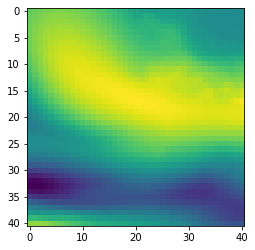

In [9]:
# Que contient id sequence et slp ?

print(X_train['id_sequence'].shape)
print(X_train['t_slp'].shape)
print(X_train['slp'].shape)
print()

print(X_train['t_slp'][0,:])

image = X_train['slp'][0, 0, :, : ]     # Une image
plt.imshow(image)                       # 


(5599, 10)
(10,)
[-6.311088e+08 -6.310656e+08 -6.310188e+08 -6.309756e+08 -6.309288e+08
 -6.308856e+08 -6.308424e+08 -6.307992e+08 -6.307524e+08 -6.307092e+08]
[-0.54593754  0.13110517  0.31880018  0.19478741 -0.22752637 -0.4018146
 -0.87440383 -0.63978505 -1.0755056  -1.712328  ]


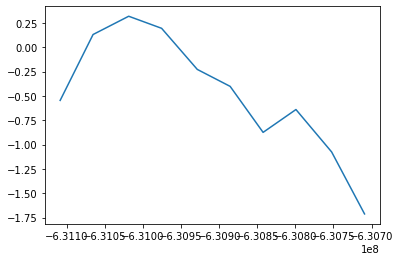

In [10]:
# Que contient surge1 ?

print(X_train['surge1_input'].shape)
print(X_train['surge1_input'][1].shape)

t = X_train['t_surge1_input'][0]
y = X_train['surge1_input'][0]

print(t)
print(y)
plt.plot(t,y)

(5599, 10)
(10,)
[-6.311016e+08 -6.310584e+08 -6.310152e+08 -6.309684e+08 -6.309252e+08
 -6.308820e+08 -6.308352e+08 -6.307920e+08 -6.307488e+08 -6.307020e+08]
[-0.41432458 -1.0094675  -1.2022604  -1.193878   -1.1435843  -0.81667477
 -0.7579987  -0.12932655 -0.17962031 -0.3724131 ]


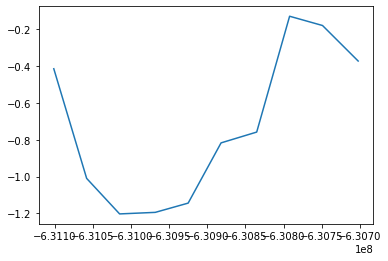

In [8]:
# Que contient surge2 ?

print(X_train['surge2_input'].shape)
print(X_train['surge2_input'][1].shape)

t = X_train['t_surge2_input'][0]
y = X_train['surge2_input'][0]

print(t)
print(y)
plt.plot(t,y)

In [12]:
# Que contient t_surgeX_output ?

print(X_train['t_surge1_output'].shape)
print(X_train['t_surge2_output'].shape)


print(X_train['t_surge1_output'][0])
print(X_train['t_surge2_output'][0])




(5599, 10)
(5599, 10)
[-6.306624e+08 -6.306192e+08 -6.305760e+08 -6.305328e+08 -6.304860e+08
 -6.304428e+08 -6.303996e+08 -6.303528e+08 -6.303096e+08 -6.302664e+08]
[-6.306588e+08 -6.306156e+08 -6.305688e+08 -6.305256e+08 -6.304824e+08
 -6.304356e+08 -6.303924e+08 -6.303492e+08 -6.303024e+08 -6.302592e+08]


In [ ]:
# TODO : créer un jeu d'entrainement / jeu de test
X_train = X
Y_train = Y

5599
1	 368.981184	 369.3808	 368.981184
6	 369.424	 369.8272	 0.04319999999995616
11	 371.576832	 371.9728	 1.7496320000000196
16	 372.019584	 372.4192	 0.04678400000000238
21	 372.465984	 372.876416	 0.04678400000000238
26	 379.932416	 380.3392	 7.055999999999983
31	 380.385984	 380.782016	 0.04678400000000238
36	 382.1248	 382.528	 1.3427839999999946
41	 382.5712	 382.9744	 0.04319999999995616
46	 384.317184	 384.7168	 1.3427839999999946
51	 384.763584	 385.1632	 0.04678400000000238
56	 386.5024	 386.909184	 1.3392000000000053
61	 386.952384	 387.355584	 0.043200000000013006
66	 388.694784	 389.097984	 1.3392000000000053
71	 389.144832	 389.548032	 0.046848000000011325
76	 389.594816	 389.990784	 0.04678400000000238
81	 391.333632	 391.740416	 1.3428480000000036
86	 391.783616	 392.186816	 0.043200000000013006
91	 393.526016	 393.925632	 1.3392000000000053
96	 393.972416	 394.3792	 0.04678400000000238
101	 395.7184	 396.118016	 1.3391999999999484
106	 396.161216	 396.568	 0.04320000

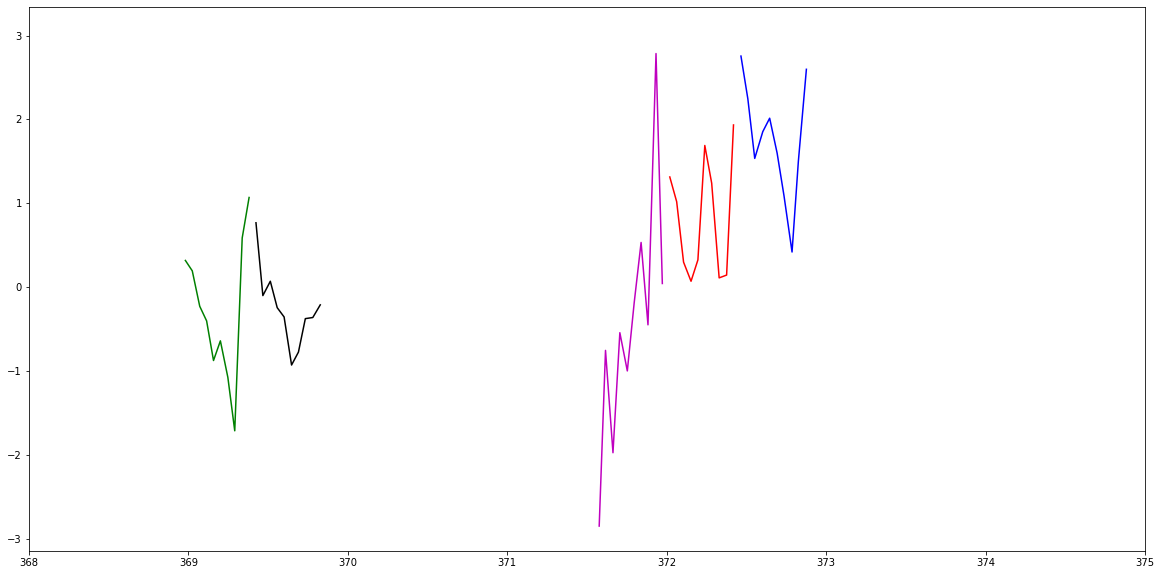

In [13]:
N = 30
pas = 5

t_temp = 0
t = []
y = []
plt.figure(figsize=(20,10))
colors = ["b", "g", "r", "c", "m", "y", "k"]

print(len(X_train['t_surge1_input']))

for k in range(1, 1+N*pas, pas):
    
    tt = list((X_train['t_surge1_input'][k]+1000000000)/1000000)
    
    print(f"{k}\t {min(tt)}\t {max(tt)}\t ", end='')
    
    print(f"{tt[0]-t_temp}")
    
    
    """
    dates = []
    # transformation en date :
    for date_nb in tt:
        dates.append(time.gmtime(date_nb))
    t += dates
    #print(dates)
    """

    yy = X_train['surge1_input'][k]
    #print(yy)
    y += list(yy)
    plt.xlim((368,375))
    plt.plot(tt, yy, color = colors[k%7])

    t_temp = tt[-1]  # derniere date

plt.show()


(5599, 40, 41, 41)


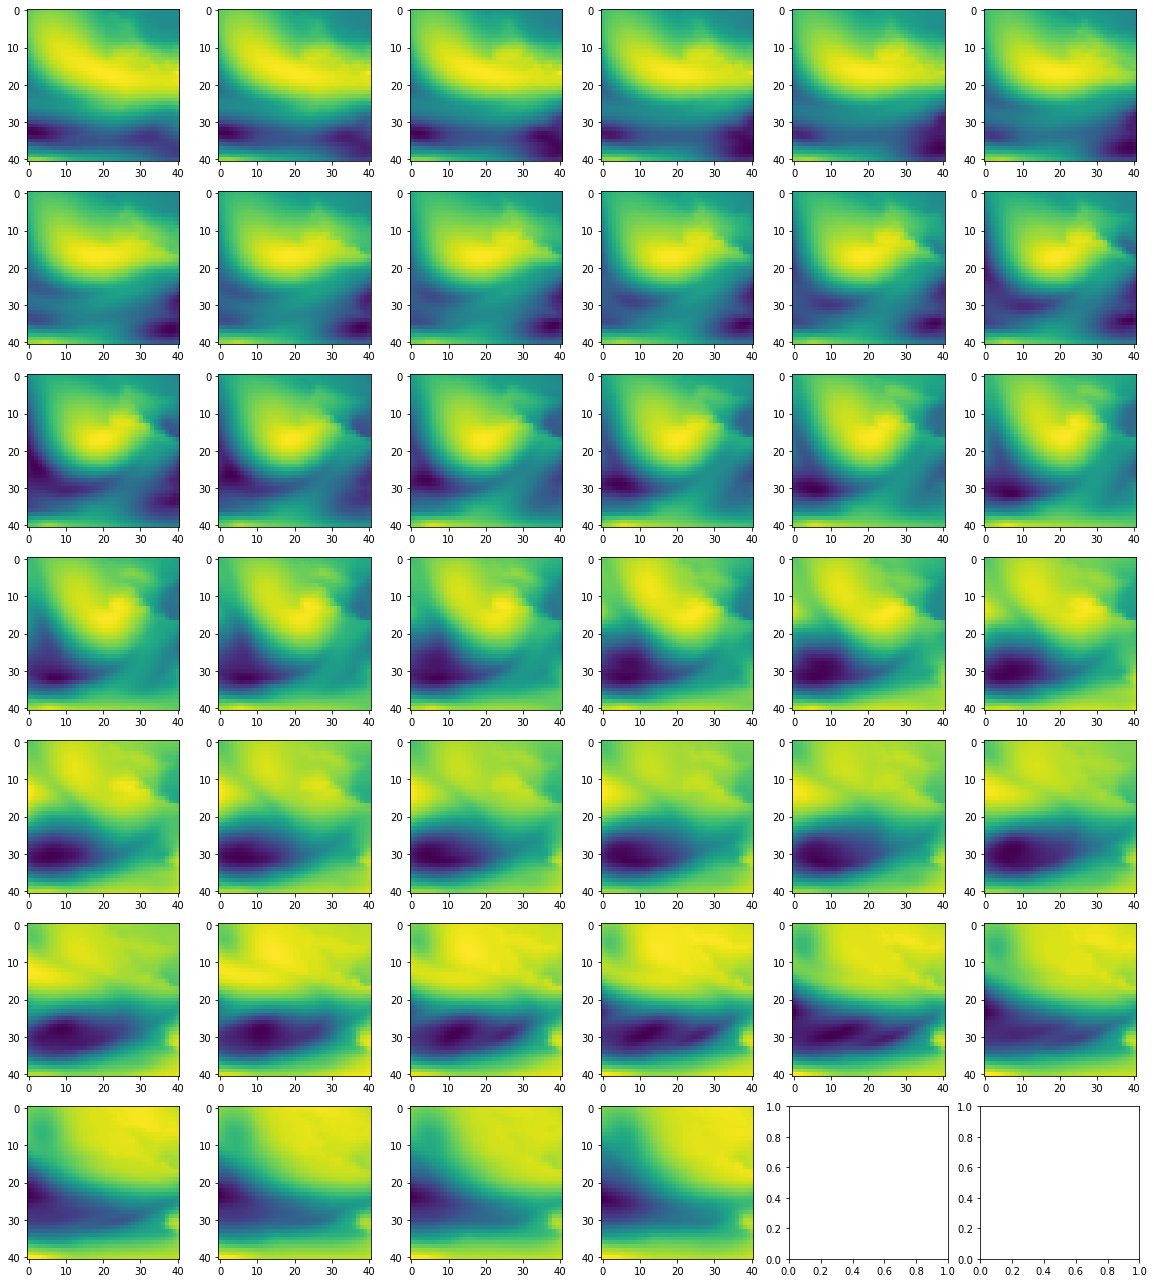

In [24]:
print(X_train['slp'].shape)

fig = plt.figure(figsize=(20,23))

axs = fig.subplots(7,6)

ligne = 0

for k in range(40):
    image = X_train['slp'][ligne, k, :, : ]     # Une image
    axs[k//6,k%6].imshow(image)
    
    # Enregistrement image par image :
    #plt.imshow(image)                       # 
    #plt.savefig(f"C:/Users/kevin/Documents/GitHub/M2_DataChallenge/images/tests/ligne_{ligne}_k_{k}")
plt.savefig(f"C:/Users/kevin/Documents/GitHub/M2_DataChallenge/images/tests/ligne_{ligne}")

In [25]:
import plotly.express as px
image = X_train['slp'][ligne, k, :, : ]     # Une image
fig = px.imshow(image)
fig.show()

In [ ]:
# TODO : A tester : prendre une image sur 2 / sur 3 / sur 4 ...

## D'autres tests plus ou moins utiles

In [ ]:
#print(len(t))
for k in range(len(t)-1):
    #print(k)
    if not t[k]<t[k+1]:

        print(f'retour à k = {k}')

#print(t)

# AUTREMENT DIT : toutes les 5 lignes, les dates se suivent !! en fait non, c'est plus compliqué !!

In [86]:
# tentative de suppression des données redondantes 

t_prec = -1000000000000000

dico = {}

for k in range(5599):

    time = X_train['t_surge1_input'][k][0]

    if time-t_prec>0:
        dico[k] = X_train['t_surge1_input'][k]

    t_prec = X_train['t_surge1_input'][k][-1]


In [87]:
dico


{0: array([-6.311088e+08, -6.310656e+08, -6.310188e+08, -6.309756e+08,
        -6.309288e+08, -6.308856e+08, -6.308424e+08, -6.307992e+08,
        -6.307524e+08, -6.307092e+08], dtype=float32),
 11: array([-6.284232e+08, -6.283836e+08, -6.283368e+08, -6.282936e+08,
        -6.282468e+08, -6.282036e+08, -6.281604e+08, -6.281172e+08,
        -6.280668e+08, -6.280272e+08], dtype=float32),
 22: array([-6.204240e+08, -6.203808e+08, -6.203376e+08, -6.202908e+08,
        -6.202476e+08, -6.202044e+08, -6.201576e+08, -6.201144e+08,
        -6.200676e+08, -6.200244e+08], dtype=float32),
 33: array([-6.181416e+08, -6.180984e+08, -6.180552e+08, -6.180084e+08,
        -6.179652e+08, -6.179184e+08, -6.178752e+08, -6.178320e+08,
        -6.177888e+08, -6.177420e+08], dtype=float32),
 44: array([-6.158664e+08, -6.158196e+08, -6.157728e+08, -6.157296e+08,
        -6.156828e+08, -6.156396e+08, -6.155928e+08, -6.155496e+08,
        -6.155028e+08, -6.154632e+08], dtype=float32),
 55: array([-6.135876e+08,

In [8]:
for cle in X_train:
    print(X_train[cle])

[   1    2    3 ... 5597 5598 5599]
[[-6.3107642e+08 -6.3106560e+08 -6.3105478e+08 ... -6.3067680e+08
  -6.3066598e+08 -6.3065523e+08]
 [-6.3097920e+08 -6.3096838e+08 -6.3095757e+08 ... -6.3057958e+08
  -6.3056883e+08 -6.3055802e+08]
 [-6.3089280e+08 -6.3088198e+08 -6.3087117e+08 ... -6.3049318e+08
  -6.3048243e+08 -6.3047162e+08]
 ...
 [ 1.2876516e+09  1.2876623e+09  1.2876732e+09 ...  1.2880512e+09
   1.2880620e+09  1.2880728e+09]
 [ 1.2877380e+09  1.2877489e+09  1.2877596e+09 ...  1.2881376e+09
   1.2881484e+09  1.2881592e+09]
 [ 1.2878351e+09  1.2878460e+09  1.2878568e+09 ...  1.2882348e+09
   1.2882456e+09  1.2882564e+09]]
[[[[102389.25 102458.25 102514.25 ... 101276.25 101275.25 101271.25]
   [102432.25 102509.25 102572.25 ... 101268.25 101266.25 101268.25]
   [102467.25 102552.25 102624.25 ... 101255.25 101255.25 101256.25]
   ...
   [101414.25 101423.25 101407.25 ... 100039.25 100005.25 100019.25]
   [101986.25 102006.25 101961.25 ... 100100.25 100076.25 100096.25]
   [102685.2

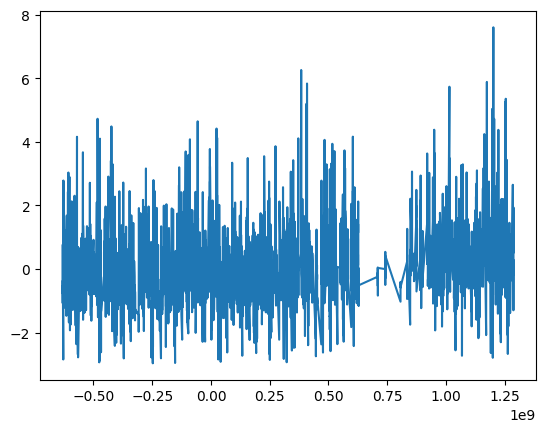

In [5]:
plt.plot(X_train['t_surge1_input'][:,0],X_train['surge1_input'][:,0])  
    # Chaque ligne (ici i=0) correspond à un jour
    # chaque colonne correspond à 1 heure précise, chaque jour
    

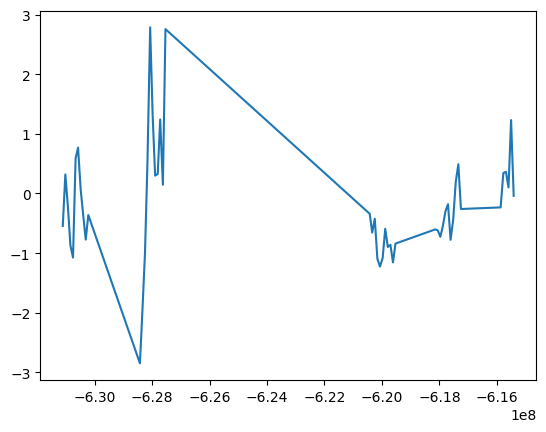

In [6]:
plt.plot(X_train['t_surge1_input'][:50,0],X_train['surge1_input'][:50,0])  
    # Chaque ligne (ici i=0) correspond à un jour
    # chaque colonne correspond à 1 heure précise, chaque jour

In [7]:
DATES = X_train['t_surge1_input']
DATES_f = DATES.flatten()

VALS = X_train['surge1_input']
VALS_f = VALS.flatten()  # Flatten à revoir : pb de concaténation

print(VALS.shape)   # 5599 jours = 180 mois = 15 ans  x 10

# On doit concatener ? Avec flatten (ligne l'une après l'autre):
#plt.plot(DATES_f, VALS_f)  # Chaque ligne (ici i=0) correspond à un jour

(5599, 10)


In [21]:
print(DATES_f.astype(int)[0])
time.gmtime(-10)

-631108800


time.struct_time(tm_year=1969, tm_mon=12, tm_mday=31, tm_hour=23, tm_min=59, tm_sec=50, tm_wday=3, tm_yday=365, tm_isdst=0)

In [44]:
f = lambda x: time.gmtime(x)
DATES_lisible = list(map(f, DATES_f.astype(int)))           # TODO : trouver l'erreur et vérifier que flaten est ok
print(DATES_3)

OSError: [Errno 22] Invalid argument

In [1]:
import datetime
import time
import calendar
time.gmtime(100000)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=2, tm_hour=3, tm_min=46, tm_sec=40, tm_wday=4, tm_yday=2, tm_isdst=0)

In [3]:
datetime.date.fromtimestamp(10)


datetime.date(1970, 1, 1)

In [7]:
datetime.datetime.utcfromtimestamp(-1000000)
calendar.timegm((1950,1,1,0,0,0,0))
time.gmtime(-100000)

OSError: [Errno 22] Invalid argument

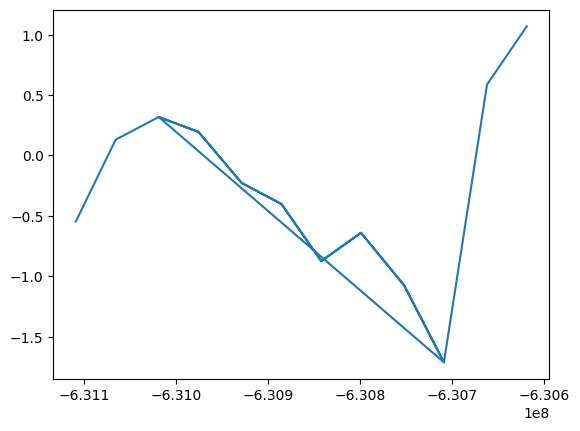

In [19]:
# 100 dernières:
plt.plot(X_train['t_surge1_input'].flatten()[0:20],X_train['surge1_input'].flatten()[0:20])  # Chaque ligne (ici i=0) correspond à un jour

In [12]:
# 40 images 41x41
print(np.shape(X_train['slp']))

(5599, 40, 41, 41)

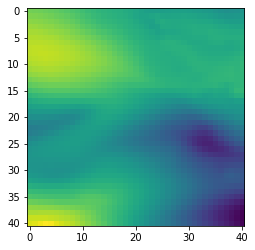

In [89]:
image = X_train['slp'][0, 0, :, : ]     # Une image
plt.imshow(image)                       # 

FileNotFoundError: [Errno 2] No such file or directory: 'images/ligne_{ligne}_k_{k}.png'

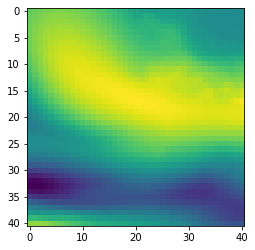

In [14]:
ligne = 0

for k in range(20):
    image = X_train['slp'][ligne, k, :, : ]     # Une image
    plt.imshow(image)                       # 
    plt.savefig("images/ligne_{ligne}_k_{k}")


TypeError: an integer is required (got type list)

In [7]:
surge_train = np.array(Y_train)[:,1]

In [16]:
def surge_prediction_metric(dataframe_y_true, dataframe_y_pred):
    weights = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_columns = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge2_columns = [
        'surge2_t0', 'surge2_t1', 'surge2_t2', 'surge2_t3', 'surge2_t4',
        'surge2_t5', 'surge2_t6', 'surge2_t7', 'surge2_t8', 'surge2_t9' ]
    surge1_score = (weights * (dataframe_y_true[surge1_columns].values - dataframe_y_pred[surge1_columns].values)**2).mean()
    surge2_score = (weights * (dataframe_y_true[surge2_columns].values - dataframe_y_pred[surge2_columns].values)**2).mean()

    return surge1_score + surge2_score

## Benchmark
Train using kNN of pressure fields at two instants in time, with 40 neighbours

In [27]:
nfields = 2; time_step_slp = 8
slp_train = []
slp_all = X_train['slp']
for i in range(5559):
    slp_train.append(np.ndarray.flatten(slp_all[i,-1]))
    for j in range(1,nfields):
        slp_train[-1] = np.concatenate( ( slp_train[-1], np.ndarray.flatten(slp_all[i,-1-j*time_step_slp]) ) )
slp_train = np.array(slp_train)

In [6]:
slp_test = []
slp_all_test = X_test['slp']
for i in range(509):
    slp_test.append(np.ndarray.flatten(slp_all_test[i,-1]))
    for j in range(1,nfields):
        slp_test[-1] = np.concatenate( ( slp_test[-1], np.ndarray.flatten(slp_all_test[i,-1-j*time_step_slp]) ) )
slp_test = np.array(slp_test)

In [7]:
tree = BallTree(slp_train)

In [8]:
surge_test_benchmark = []; k = 40
for i in range(509):
    dist, ind = tree.query([slp_test[i]], k=k)
    surge_test_benchmark.append(np.mean(surge_train[ind[0]], axis=0))
surge_test_benchmark = np.array(surge_test_benchmark)

In [9]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
y_test_benchmark = pd.DataFrame(data=surge_test_benchmark, columns=y_columns, index=X_test['id_sequence'])
y_test_benchmark.to_csv('Y_test_benchmark.csv', index_label='id_sequence', sep=',')